In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns;sns.set()

[[ 1.41281595  1.5303347 ]
 [ 1.81336135  1.6311307 ]
 [ 1.43289271  4.37679234]
 [ 1.87271752  4.18069237]
 [ 2.09517785  1.0791468 ]
 [ 2.73890793  0.15676817]
 [ 3.18515794  0.08900822]
 [ 2.06156753  1.96918596]
 [ 2.03835818  1.15466278]
 [-0.04749204  5.47425256]
 [ 1.71444449  5.02521524]
 [ 0.22459286  4.77028154]
 [ 1.06923853  4.53068484]
 [ 1.53278923  0.55035386]
 [ 1.4949318   3.85848832]
 [ 1.1641107   3.79132988]
 [ 0.74387399  4.12240568]
 [ 2.29667251  0.48677761]
 [ 0.44359863  3.11530945]
 [ 0.91433877  4.55014643]
 [ 1.67467427  0.68001896]
 [ 2.26908736  1.32160756]
 [ 1.5108885   0.9288309 ]
 [ 1.65179125  0.68193176]
 [ 2.49272186  0.97505341]
 [ 2.33812285  3.43116792]
 [ 0.67047877  4.04094275]
 [-0.55552381  4.69595848]
 [ 2.16172321  0.6565951 ]
 [ 2.09680487  3.7174206 ]
 [ 2.18023251  1.48364708]
 [ 0.43899014  4.53592883]
 [ 1.24258802  4.50399192]
 [ 0.00793137  4.17614316]
 [ 1.89593761  5.18540259]
 [ 1.868336    0.93136287]
 [ 2.13141478  1.13885728]
 

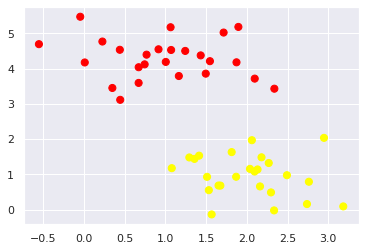

In [3]:
from sklearn.datasets import make_blobs
X,y= make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.60)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="autumn");
print(X,y)

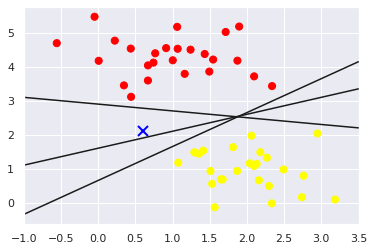

In [4]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0], X[:, 1], c=y, s=50, cmap = 'autumn')
plt.plot([0.6],[2.1], 'x', color = 'blue', markeredgewidth=2, markersize = 10)

for m,b in [(1,0.65), (0.5,1.6), (-0.2, 2.9)]:
  plt.plot(xfit, m* xfit +b, '-k')

plt.xlim(-1,3.5);

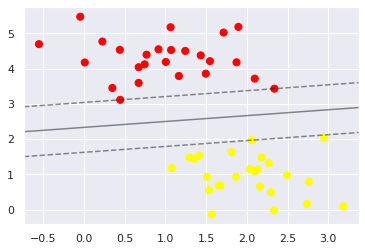

In [5]:
from sklearn.svm import SVC
model = SVC(kernel='linear',C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

def plot_svc_decision_function(model, ax=None, plot_support=True):
  """Plot the decision function for a 2D SVC"""
  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  #create grid to evaluate model
  x = np.linspace(xlim[0],xlim[1],30)
  y = np.linspace(ylim[0],ylim[1],30)
  Y, X = np.meshgrid(y,x)
  xy=np.vstack([X.ravel(), Y.ravel()]).T
  P= model.decision_function(xy).reshape(X.shape)

  #plot decision boundary and margins
  ax.contour(X,Y, P, colors= 'k',
             levels=[-1,0,1], alpha=0.5,
             linestyles=['--','-','--'])
  #plot support vectors
  if plot_support:
    ax.scatter(model.support_vectors_[:,0],
               model.support_vectors_[:,1],
               s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap = 'autumn')
plot_svc_decision_function(model);